In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(4321)

# Task 1

In [28]:
N = 400
D = 200
P = 100

## Two For-loops over i, j

In [29]:
X = np.random.normal(size=(N, D))
T = np.random.normal(size=(P, D))
result_1 = np.empty((N, P))

In [30]:
%%timeit 
for n in range(N):
    for p in range(P):
        result_1[n, p] = np.sum((X[n,:]-T[p,:]) ** 2)

258 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numpy broadcasting

In [31]:
X, T = X[:, np.newaxis, :], T[np.newaxis, ...]
print(X.shape, T.shape)
# %timeit result_2 = np.sum( (X-T)**2, axis=-1)

(400, 1, 200) (1, 100, 200)


In [32]:
result_2 = np.sum( (X-T)**2, axis=-1)

### check the values are equal

In [38]:
np.abs((result_1 - result_2)) <= 1e-7

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## pytorch

In [34]:
X = torch.tensor(X,dtype=torch.float32)
T = torch.tensor(T,dtype=torch.float32)
%timeit result_3 = torch.sum( (X-T)**2, dim=-1)

4.22 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
result_3 = torch.sum( (X-T)**2, dim=-1)

### check the values are equal

In [39]:
np.abs((result_1 - result_2)) <= 1e-5

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

# Task 2

## Generate data and initialize variables

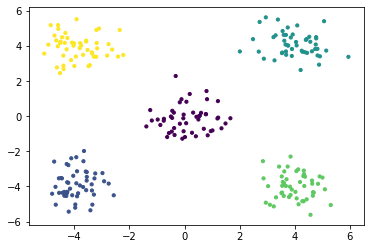

In [46]:
means = torch.Tensor([(0.0,0.0),(-4.0,-4.0),(4.0,4.0),(4.0,-4.0),(-4.0,4.0)])
def sample(mu, var, nb_samples=50):
    return torch.stack([torch.normal(mu, var.sqrt()) for _ in range(nb_samples)], dim=0)
X = torch.cat(    [sample(means[i],torch.Tensor([0.5, 0.5]))   for i in range(5)], dim=0)
y = torch.cat([torch.ones(50)*i for i in range(5)])
plt.scatter(X[:,0],X[:,1], c=y, s=10)
plt.savefig('data.png')

## kmeans algorithm

In [47]:
def find_cluster(X, centers):
    temp = torch.sum((X.unsqueeze(1) - centers.unsqueeze(0))**2, dim=-1)
    clusters_index = torch.argmin(temp, dim=1)
    return clusters_index

def comp_cent(data, clusters_index, centers):
    for i in range(len(centers)):
        temp = torch.mean(data[clusters_index==i],dim=0)
        if len(temp.size()) != 0:
            centers[i, :] = temp
            
def plot(x, y, y_correct, centers, centers_correct):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    ax1.scatter(centers[:,0], centers[:,1], s=100, c='r')
    ax2.scatter(centers_correct[:,0], centers_correct[:,1], s=100, c='r')
    ax1.scatter(X[:,0],X[:,1], c=y, s=10)
    ax2.scatter(X[:,0],X[:,1], c=y_correct, s=10)
    ax1.set_title('start')
    ax2.set_title('After training')
    plt.savefig(f'{len(centers)}-clusters.png')

## 2 Clusters

In [48]:
# you should run this cell only once
centers = torch.randn(2,2)
centers

tensor([[ 0.9549,  1.1123],
        [ 0.1589, -0.1102]])

In [49]:
centers_0 = centers.clone()
for epoch in range(1000):
    clusters_index = find_cluster(X, centers)
    comp_cent(X, clusters_index, centers)
    if epoch == 0:
        y_0 = clusters_index.clone()
        

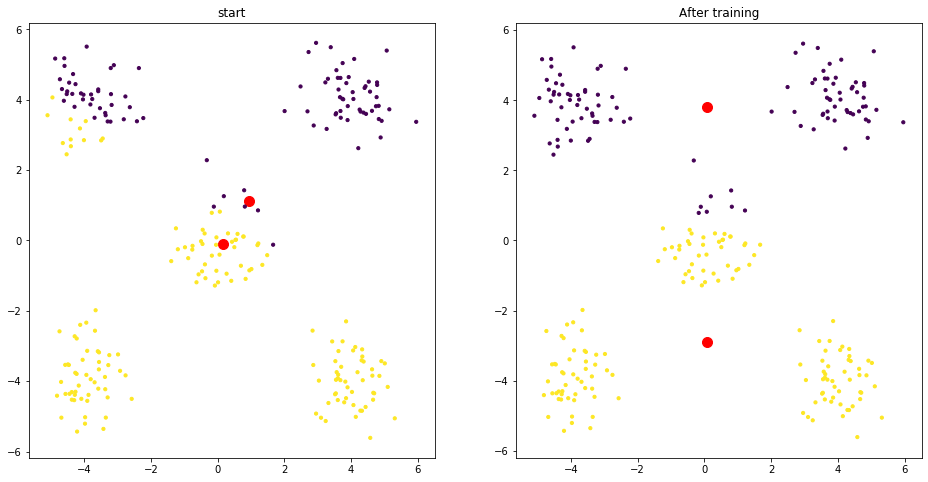

In [50]:
plot(X, y_0, clusters_index, centers_0, centers)

## 5 Clusters

In [51]:
# you should run this cell only once
centers = torch.randn(5,2)
centers

tensor([[-0.0192, -0.5945],
        [ 0.4502,  1.2491],
        [ 0.2809, -0.3568],
        [ 0.8227,  2.0239],
        [-0.0444,  0.3317]])

In [52]:
centers_0 = centers.clone()
for epoch in range(1000):
    clusters_index = find_cluster(X, centers)
    comp_cent(X, clusters_index, centers)
    if epoch == 0:
        y_0 = clusters_index.clone()

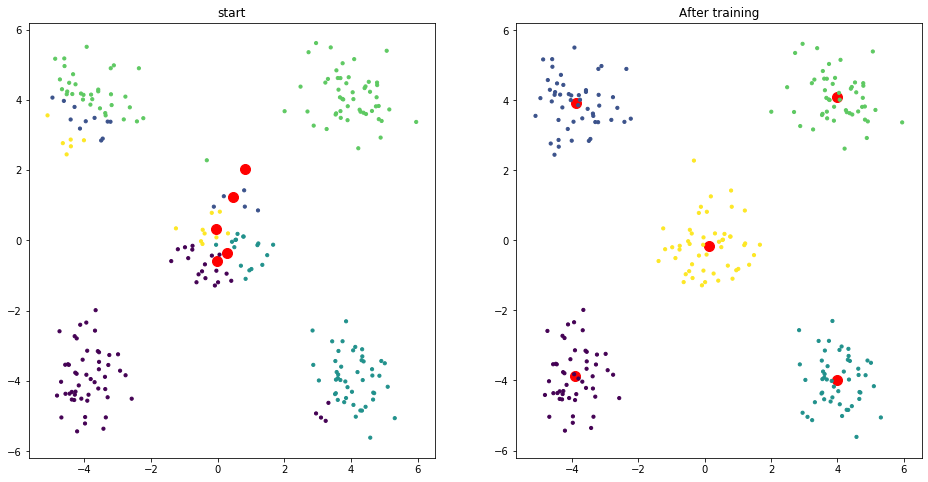

In [53]:
plot(X, y_0, clusters_index, centers_0, centers)

## 8 Clusters

In [54]:
# you should run this cell only once
centers = torch.randn(8,2)
centers

tensor([[ 0.1655,  0.3321],
        [-0.4580,  0.1463],
        [ 0.1172, -0.4128],
        [ 0.6140,  1.1933],
        [ 1.6211, -1.1333],
        [ 0.5611,  1.1292],
        [-0.8506,  0.2211],
        [ 0.5702, -0.5232]])

In [55]:
centers_0 = centers.clone()
for epoch in range(1000):
    clusters_index = find_cluster(X, centers)
    comp_cent(X, clusters_index, centers)
    if epoch == 0:
        y_0 = clusters_index.clone()
        

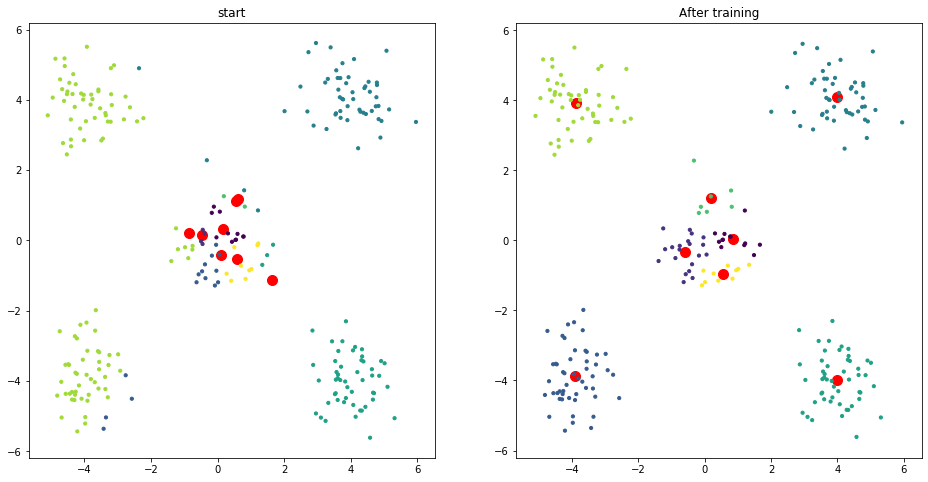

In [56]:
plot(X, y_0, clusters_index, centers_0, centers)